In [1]:
from covid_simulation import * 
import pickle

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

In [2]:

type_of_network, N  = (3,50000)
data_dir = os.path.join('../data','data_' + str(type_of_network)+'_'+ str(N))
print(data_dir)


../data\data_3_50000


In [3]:
G=nx.read_gpickle(os.path.join(data_dir,'G_aged.p'))

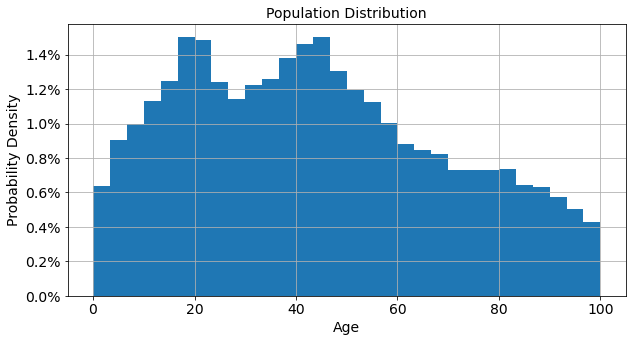

In [4]:

age_list=[y['age'] for x,y in G.nodes(data=True)]
# plot population dist
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(age_list, bins=30, density=True)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.grid()
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.title('Population Distribution', fontsize=14)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0, decimals=1))
plt.savefig(os.path.join(data_dir,'Population Distribution.eps'), format='eps')


In [2]:
def plot_dist_per_age(ax, data, age_group,  **kwargs): 

    xlim= kwargs.get('xlim', [0, 40])
    bins= kwargs.get('bins', 50)

    sns.distplot(data, kde=False, fit=stats.norm, axlabel='# Connections', norm_hist=True, 
    ax=ax, bins=bins)
    (mu, sigma) = stats.norm.fit(data)
    ax.set_title('Age Group: {}'.format(age_group))
    ax.set_xlim(xlim)
    #place a text box in upper left in axes coords
    textstr = "$\mu=${0:.2g}\n $\sigma=${1:.2f})".format(mu, sigma)
    ax.text(0.68, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=1.0))
    ax.locator_params(axis='x', nbins=5)
    

In [6]:

G=nx.read_gpickle(os.path.join(data_dir,'G_aged.p'))
familiy_size_per_age={1:[], 2:[], 3:[], 4:[]}
for n,y in G.nodes(data=True): 
    age_group=find_age_group(y['age'])
    if 'group' in y: 
        group=y['group']
        familiy_size_per_age[age_group].append(len(select_per_attr(G,'group',group)))
    else: 
        familiy_size_per_age[age_group].append(1)
        
[np.mean(familiy_size_per_age[x]) for x in range(1,5)]

[4.432719546742209, 4.360491071428571, 4.150377484464075, 3.3557108699650544]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

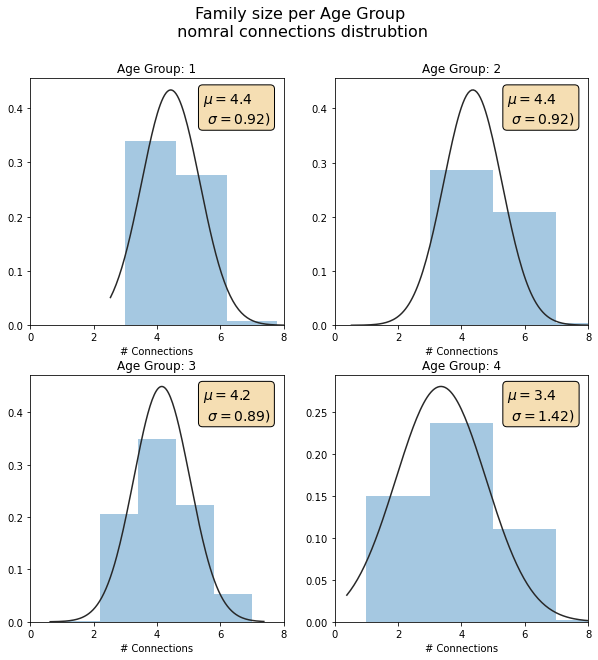

In [7]:


fig, axes = plt.subplots(2,2, figsize=(10,10))
plot_dist_per_age(axes[0,0], familiy_size_per_age[1], '1', xlim=[0,8], bins=5)
plot_dist_per_age(axes[0,1], familiy_size_per_age[2], '2', xlim=[0,8], bins=5)
plot_dist_per_age(axes[1,0], familiy_size_per_age[3], '3', xlim=[0,8], bins=5)
plot_dist_per_age(axes[1,1], familiy_size_per_age[4], '4', xlim=[0,8], bins=5)
fig.suptitle('Family size per Age Group\n nomral connections distrubtion', fontsize=16)
plt.savefig(os.path.join(data_dir,'Family size per Age Group - nomral connections distrubtion.eps'), format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

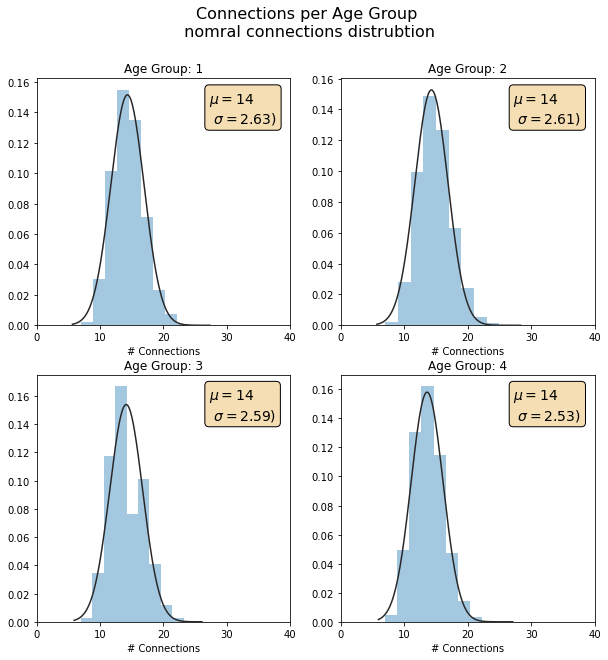

In [8]:
G=nx.read_gpickle(os.path.join(data_dir,'G_aged.p'))
degree_per_age={1:[], 2:[], 3:[], 4:[]}
for n,y in G.nodes(data=True): 
    age_group=find_age_group(y['age'])
    degree_per_age[age_group].append(len(list(nx.neighbors(G, n))))

fig, axes = plt.subplots(2,2, figsize=(10,10))
plot_dist_per_age(axes[0,0], degree_per_age[1], '1', bins=10)
plot_dist_per_age(axes[0,1], degree_per_age[2], '2', bins=10)
plot_dist_per_age(axes[1,0], degree_per_age[3], '3', bins=10)
plot_dist_per_age(axes[1,1], degree_per_age[4], '4', bins=10)
fig.suptitle('Connections per Age Group\n nomral connections distrubtion', fontsize=16)
plt.savefig(os.path.join(data_dir,'Connections per Age Group - nomral connections distrubtion.eps'), format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

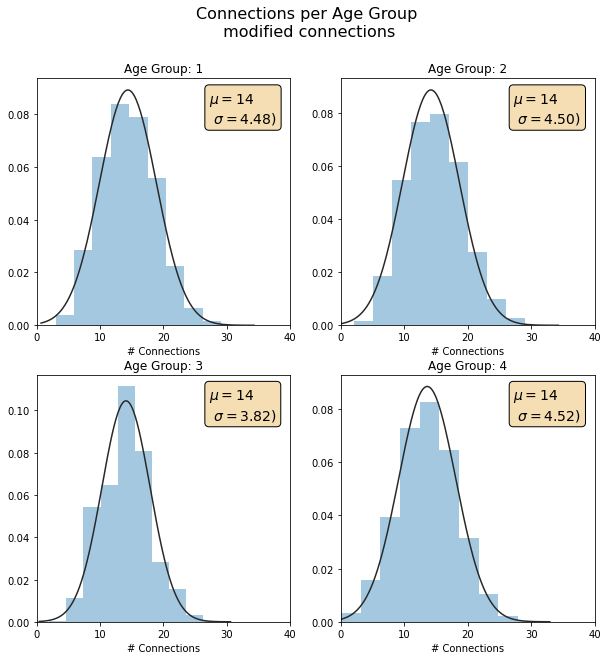

In [9]:
G=nx.read_gpickle(os.path.join(data_dir,'G_equi_aged.p'))
degree_per_age={1:[], 2:[], 3:[], 4:[]}
for n,y in G.nodes(data=True): 
    age_group=find_age_group(y['age'])
    degree_per_age[age_group].append(len(list(nx.neighbors(G, n))))

fig, axes = plt.subplots(2,2, figsize=(10,10))
plot_dist_per_age(axes[0,0], degree_per_age[1], '1', bins=10)
plot_dist_per_age(axes[0,1], degree_per_age[2], '2', bins=10)
plot_dist_per_age(axes[1,0], degree_per_age[3], '3', bins=10)
plot_dist_per_age(axes[1,1], degree_per_age[4], '4', bins=10)
fig.suptitle('Connections per Age Group\n modified connections', fontsize=16)
plt.savefig(os.path.join(data_dir,'Connections per Age Group - modified connections.eps'), format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

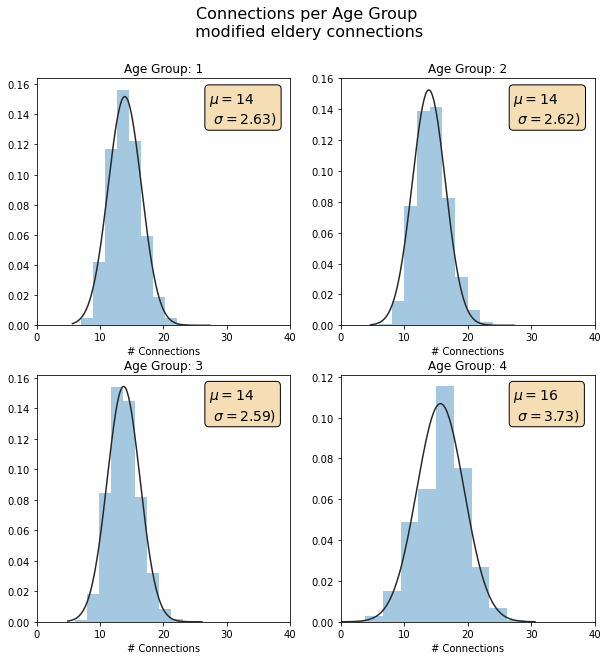

In [10]:
G=nx.read_gpickle(os.path.join(data_dir,'G_aged_eldery_grouped.p'))
degree_per_age={1:[], 2:[], 3:[], 4:[]}
for n,y in G.nodes(data=True): 
    age_group=find_age_group(y['age'])
    degree_per_age[age_group].append(len(list(nx.neighbors(G, n))))

fig, axes = plt.subplots(2,2, figsize=(10,10))
plot_dist_per_age(axes[0,0], degree_per_age[1], '1', bins=10)
plot_dist_per_age(axes[0,1], degree_per_age[2], '2', bins=10)
plot_dist_per_age(axes[1,0], degree_per_age[3], '3', bins=10)
plot_dist_per_age(axes[1,1], degree_per_age[4], '4', bins=10)
fig.suptitle('Connections per Age Group\n modified eldery connections', fontsize=16)
plt.savefig(os.path.join(data_dir,'Connections per Age Group - modified eldery connections.eps'), format='eps')
plt.show()

# Simulation Results

In [3]:
basic_p = 0.01
simulation_config=[{'id': 1, 'label':'State1', 
                    'G_filename': 'G_aged.p', 
                    'p': [basic_p, basic_p, None]}, 

                    {'id': 2, 'label':'State2', 
                    'G_filename': 'G_equi_aged.p', 
                    'p': [0.0, basic_p, None]}, 

                    {'id': 3, 'label':'State3', 
                    'G_filename': 'G_aged.p', 
                    'p': [basic_p, basic_p, 0.0]}, 

                    {'id': 4, 'label':'State4', 
                    'G_filename': 'G_aged.p', 
                    'p': [basic_p/2, basic_p, None]}, 

                    {'id': 5, 'label':'State5', 
                    'G_filename': 'G_aged.p', 
                    'p': [0.0, basic_p, None]}
]


State1
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


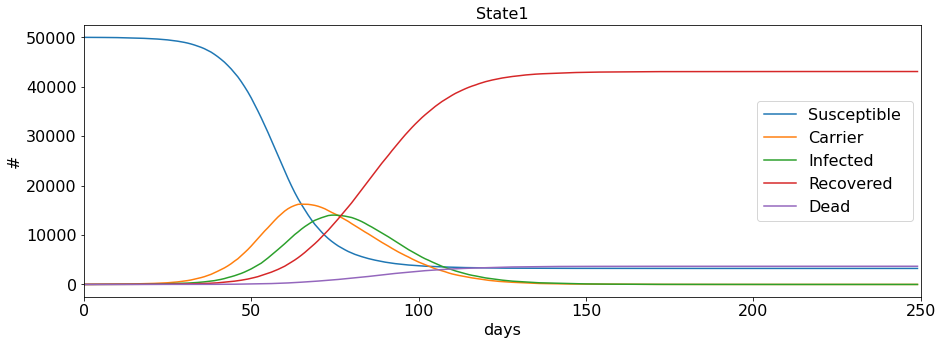

State2
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


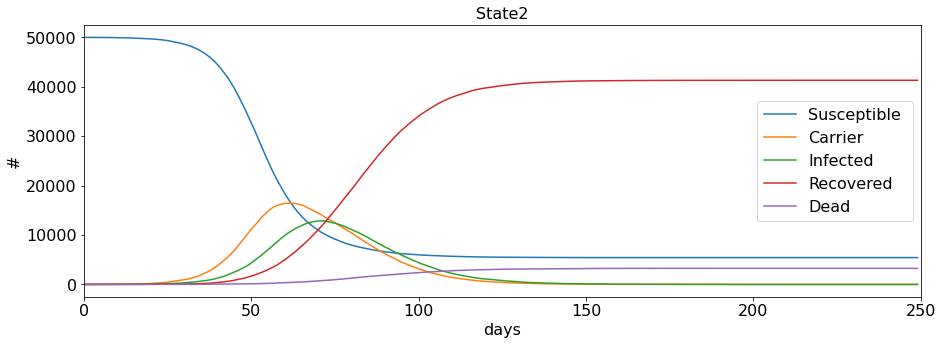

State3
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


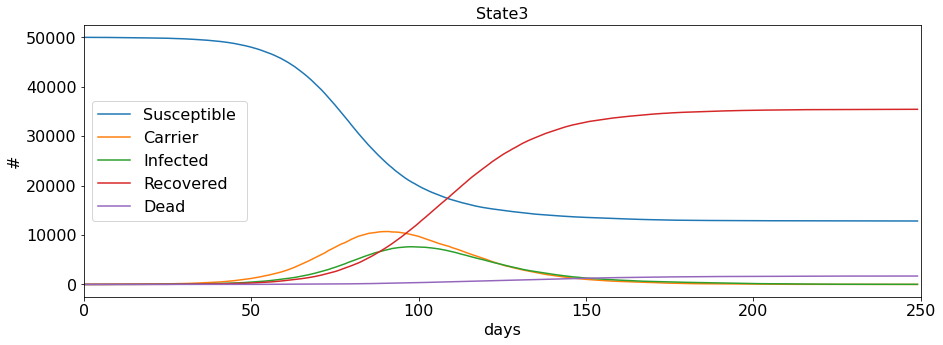

State4
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


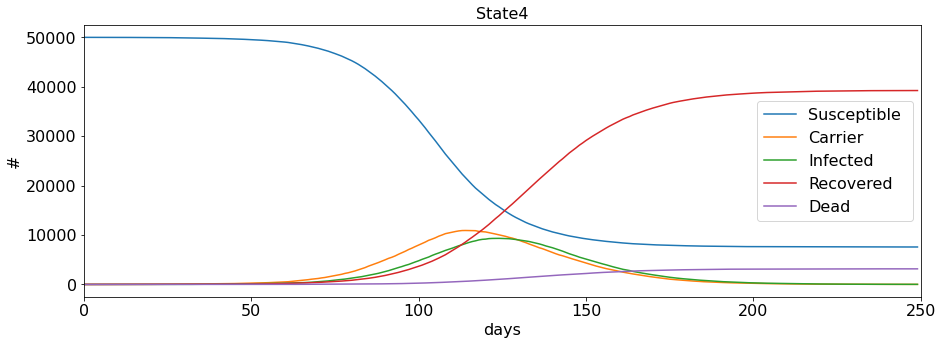

State5
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


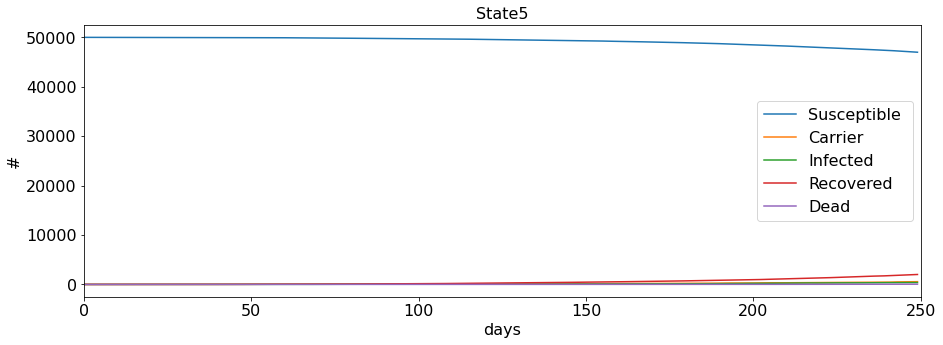

[None, None, None, None, None]

In [5]:
def disp_simulation_results(d): 
    print(d['label'])
    logStatus = pickle.load(open(
        os.path.join(data_dir,'G_logState{0}_iter_0.p'.format(d['id']) ), 'rb'))
        
    plt.figure(figsize=(15,5))
    plt.plot(list(map(lambda t : get_status_count(logStatus, t), range(250))))
    plt.xlabel('days', fontsize=16)
    plt.ylabel('#' , fontsize=16)
    plt.xlim([0, 250])
    plt.xticks( fontsize=16)
    plt.yticks( fontsize=16)
    plt.legend(['Susceptible ','Carrier','Infected','Recovered', 'Dead'], prop={'size': 16})
    plt.title(d['label'], fontsize=16)
    plt.savefig(os.path.join(data_dir,'full_simulation - {}.png'.format(d['label'])), format='png')
    plt.savefig(os.path.join(data_dir,'full_simulation - {}.pdf'.format(d['label'])), format='pdf')
    plt.savefig(os.path.join(data_dir,'full_simulation - {}.eps'.format(d['label'])), format='eps')
    plt.show()

[disp_simulation_results(x) for x in simulation_config]

State1
State2
State3
State4
State5
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


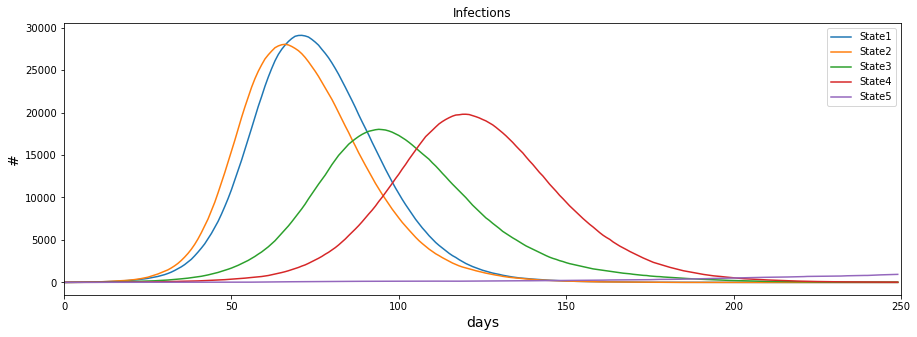

In [13]:
logStatus_summary={}
for k, d in enumerate(simulation_config) : 
    print(d['label'])
    logStatus = pickle.load(open(
        os.path.join(data_dir,'G_logState{0}_iter_0.p'.format(d['id']) ), 'rb'))
    logStatus_summary[k] = list(map(lambda t : sum(get_status_count(logStatus, t)[1:3]), range(250)))

plt.figure(figsize=(15,5))
plt.plot(np.vstack([y for x,y in logStatus_summary.items()]).T)
#plt.legend([x['label'].split()[0] for x in  simulation_config])
plt.legend([x['label'] for x in  simulation_config])
plt.xlabel('days', fontsize=14)
plt.ylabel('#', fontsize=14)
plt.xlim([0, 250])
plt.title('Infections')
plt.savefig(os.path.join(data_dir,'{}.png'.format('Infections')), format='png')
plt.savefig(os.path.join(data_dir,'{}.eps'.format('Infections')), format='eps')
plt.show()

State1
State2
State3
State4
State5
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


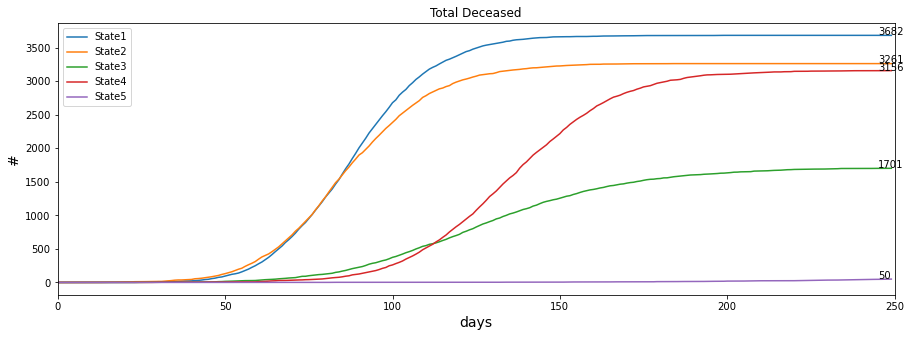

In [14]:
logStatus_summary={}
for k, d in enumerate(simulation_config) : 
    print(d['label'])
    logStatus = pickle.load(open(
        os.path.join(data_dir,'G_logState{0}_iter_0.p'.format(d['id']) ), 'rb'))
    logStatus_summary[k] = list(map(lambda t : get_status_count(logStatus, t)[4], range(250)))

plt.figure(figsize=(15,5))
plt.plot(np.vstack([y for x,y in logStatus_summary.items()]).T)
plt.legend([x['label'] for x in  simulation_config])
plt.xlabel('days', fontsize=14)
plt.ylabel('#', fontsize=14)
plt.xlim([0, 250])
plt.title('Total Deceased')
[plt.text(245, x[-1]+5, x[-1]) for k,x in logStatus_summary.items()] 
plt.savefig(os.path.join(data_dir,'{}.png'.format('Total Deceased')), format='png')
plt.savefig(os.path.join(data_dir,'{}.eps'.format('Total Deceased')), format='eps')
plt.show()

## Collect Results

In [4]:
def age_group_cont(G,list_of_nodes):
    age_group_cont={1:0, 2:0, 3:0, 4:0}
    for n in list_of_nodes: 
        age_group=find_age_group(G.nodes[n]['age'])
        age_group_cont[age_group] += 1
    return age_group_cont

In [5]:
logStatus_summary={}
for k, d in enumerate(simulation_config) : 
    print(d['label'])
    G=nx.read_gpickle(os.path.join(data_dir,d['G_filename']))

    logStatus = pickle.load(open(
        os.path.join(data_dir,'G_logState{0}_iter_0.p'.format(d['id']) ), 'rb'))
    logStatus_summary[k] = list(map(lambda t : get_status_count(logStatus, t)[4], range(250)))

State1
State2
State3
State4
State5


In [17]:
data_tbl=[]
for iter in range(9): 
    for k, d in enumerate(simulation_config) : 
        G=nx.read_gpickle(os.path.join(data_dir,d['G_filename']))
        logStatus = pickle.load(open(os.path.join(data_dir,'G_logState{0}_iter_{1}.p'.format(d['id'], iter) ), 'rb'))    
        for t in range(250): 
            age_count_per_state =  age_group_cont(G,logStatus[t]['D'])  # death only 

            dic = {'iter': iter, 't': t, 'state': k, 
                    'infections' : sum(get_status_count(logStatus, t)[1:3]), 
                    'death' : get_status_count(logStatus, t)[4], 
                    'death_age_1' : age_count_per_state[1], 
                    'death_age_2' : age_count_per_state[2], 
                    'death_age_3' : age_count_per_state[3], 
                    'death_age_4' : age_count_per_state[4]
                    }

            data_tbl.append(dic)
            #break




In [18]:
df =pd.DataFrame(data_tbl)
df.head()

df.to_csv(os.path.join(data_dir,'result_table.csv'))

In [6]:
df = pd.read_csv(os.path.join(data_dir,'result_table.csv'))

In [7]:
df.head()

,Unnamed: 0,iter,t,state,infections,death,death_age_1,death_age_2,death_age_3,death_age_4
0,0,0,0,0,9,0,0,0,0,0
1,1,0,1,0,16,0,0,0,0,0
2,2,0,2,0,15,0,0,0,0,0
3,3,0,3,0,20,0,0,0,0,0
4,4,0,4,0,24,0,0,0,0,0


In [8]:
pkmn_type_colors = ['#000099',  # Blue
                    '#ff9900',  # orange
                    '#00cc66',  # green
                    '#cc3300',  # red
                    '#9900cc',  # purple

                   ]

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

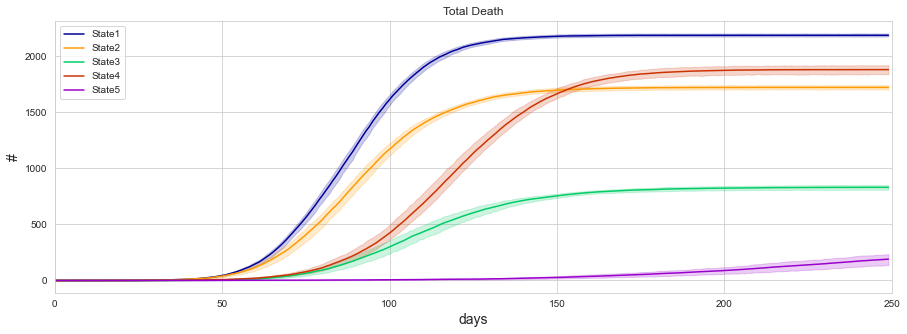

In [10]:
plt.figure(figsize=(15,5))

sns.set_style("whitegrid")

sns.color_palette("tab10")
sns.lineplot(x="t", y="death", hue="state", data=df,  palette=pkmn_type_colors)

plt.legend([x['label'] for x in  simulation_config])
plt.xlabel('days', fontsize=14)
plt.ylabel('#', fontsize=14), 
plt.xlim([0, 250])
plt.title('Total Death')

# [plt.text(145, x[-1]+5, x[-1]) for k,x in logStatus_summary.items()] 
#plt.savefig(os.path.join(data_dir,'{}.png'.format('tota_ death')), format='png')#plt.savefig(os.path.join(data_dir,'{}.eps'.format('total death'_), format='eps')
plt.show()

In [10]:
df2=df.groupby(['t','state']).mean()
meanTotalDeath=df2.xs(249)['death']


In [11]:
meanTotalDeath


state
0    2183.333333
1    1719.111111
2     829.333333
3    1877.555556
4     189.333333
Name: death, dtype: float64

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

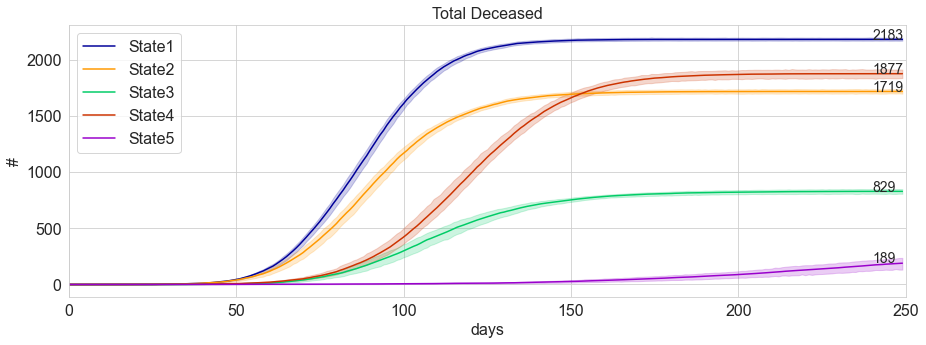

In [86]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")

sns.color_palette("tab10")
sns.lineplot(x="t", y="death", hue="state", data=df,  palette=pkmn_type_colors)

plt.legend([x['label'] for x in  simulation_config], prop={'size': 16})
plt.xlabel('days', fontsize=16)
plt.xticks( fontsize=16)
plt.ylabel('#', fontsize=16)
plt.yticks( fontsize=16)
plt.xlim([0, 250])
plt.title('Total Deceased', fontsize=16)
# [plt.text(240, x+5, int(x),  fontsize=14) for x in meanTotalDeath.to_numpy()] 

[plt.text(240, 2183, 2183,  fontsize=14),
 plt.text(240, 1719, 1719,  fontsize=14),
 plt.text(240, 829, 829,  fontsize=14),
 plt.text(240, 1877, 1877,  fontsize=14),
 plt.text(240, 189, 189, fontsize=14)]

plt.savefig(os.path.join(data_dir,'{}.png'.format('Total_Deceased_span')), format='png')
plt.savefig(os.path.join(data_dir,'{}.pdf'.format('Total_Deceased_span')), format='pdf')
plt.savefig(os.path.join(data_dir,'{}.eps'.format('Total_Deceased_span')), format='eps')

plt.show()

In [85]:
[(240, int(x)+5, int(x)) for x in meanTotalDeath.to_numpy()] 

[(240, 2188, 2183),
 (240, 1724, 1719),
 (240, 834, 829),
 (240, 1882, 1877),
 (240, 194, 189)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

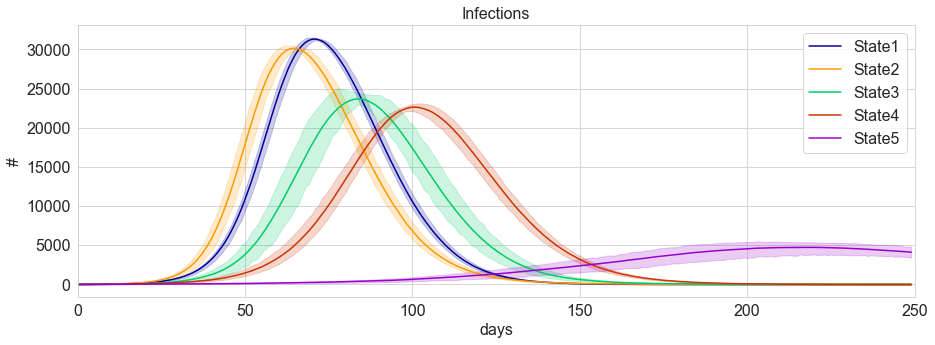

In [87]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")

sns.color_palette("tab10")
sns.lineplot(x="t", y="infections", hue="state", data=df,  palette=pkmn_type_colors)

plt.legend([x['label'] for x in  simulation_config], prop={'size': 16})
plt.xlabel('days', fontsize=16)
plt.xticks( fontsize=16)
plt.ylabel('#', fontsize=16)
plt.yticks( fontsize=16)
plt.xlim([0, 250])
plt.title('Infections', fontsize=16)

#[plt.text(x.index(max(x)), max(x)+1, max(x)) for k,x in logStatus_summary.items()] 
plt.savefig(os.path.join(data_dir,'{}.png'.format('Infections_span')), format='png')
plt.savefig(os.path.join(data_dir,'{}.pdf'.format('Infections_span')), format='pdf')
plt.savefig(os.path.join(data_dir,'{}.eps'.format('Infections_span')), format='eps')

plt.show()

# Stacked Plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


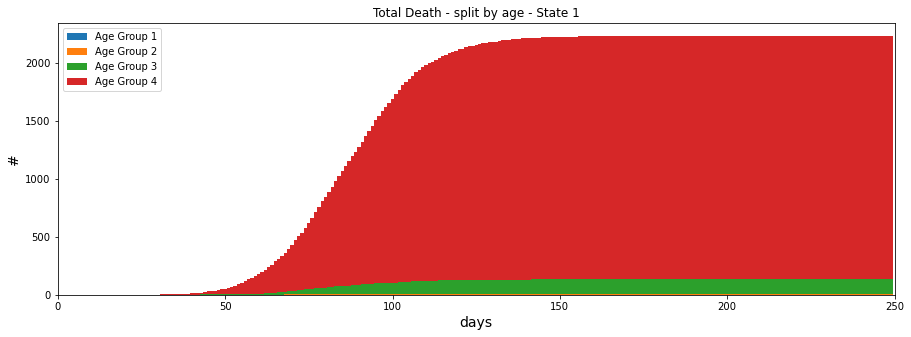

In [12]:
import matplotlib.pyplot as plt

df2 = df.loc[(df['iter'] == 0) & (df['state']== 0)]

labels = df2['t']
age_1 = df2['death_age_1']
age_2 = df2['death_age_2']
age_3 = df2['death_age_3']
age_4 = df2['death_age_4']

# men_std = [2, 3, 4, 1, 2]
# women_std = [3, 5, 2, 3, 3]

width = 1.       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots(figsize=(15,5))

ax.bar(labels, age_1, width, label='Age Group 1')
ax.bar(labels, age_2, width, bottom=age_1,  label='Age Group 2')
ax.bar(labels, age_3, width, bottom=age_2,  label='Age Group 3')
ax.bar(labels, age_4, width, bottom=age_3,  label='Age Group 4')

# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')

plt.xlabel('days', fontsize=14)
plt.ylabel('#', fontsize=14), 
plt.xlim([0, 250])
plt.title('Total Death - split by age - State 1')
ax.legend()
plt.savefig(os.path.join(data_dir,'{}.png'.format('Total Death - split by age - State 1')), format='png')
plt.savefig(os.path.join(data_dir,'{}.eps'.format('Total Death - split by age - State 1')), format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


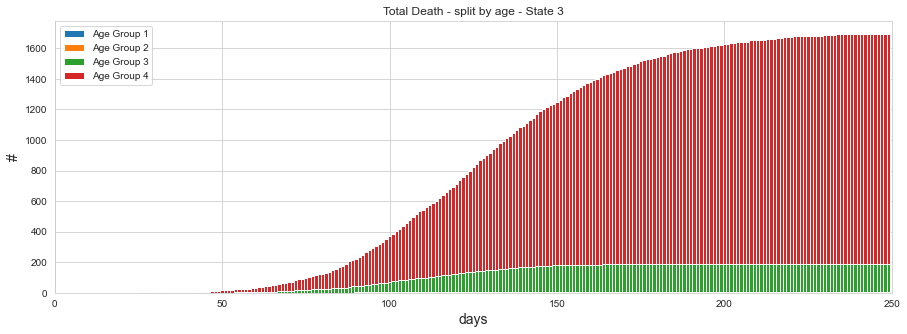

In [25]:
import matplotlib.pyplot as plt

df2 = df.loc[(df['iter'] == 0) & (df['state']== 2)]
labels = df2['t']
age_1 = df2['death_age_1']
age_2 = df2['death_age_2']
age_3 = df2['death_age_3']
age_4 = df2['death_age_4']

# men_std = [2, 3, 4, 1, 2]
# women_std = [3, 5, 2, 3, 3]

width =1.     # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(15,5))

ax.bar(labels, age_1, width,  label='Age Group 1')
ax.bar(labels, age_2, width, bottom=age_1,  label='Age Group 2')
ax.bar(labels, age_3, width, bottom=age_2,  label='Age Group 3')
ax.bar(labels, age_4, width, bottom=age_3,  label='Age Group 4')

plt.xlabel('days', fontsize=14)
plt.ylabel('#', fontsize=14), 
plt.xlim([0, 250])
plt.title('Total Death - split by age - State 3')
ax.legend()
plt.savefig(os.path.join(data_dir,'{}.png'.format('Total Death - split by age - State 3')), format='png')
plt.savefig(os.path.join(data_dir,'{}.eps'.format('Total Death - split by age - State 3')), format='eps')
plt.show()

In [13]:
df2=df.loc[df['t']==249].groupby('state').mean()
df2_std=df.loc[df['t']==249].groupby('state').std()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


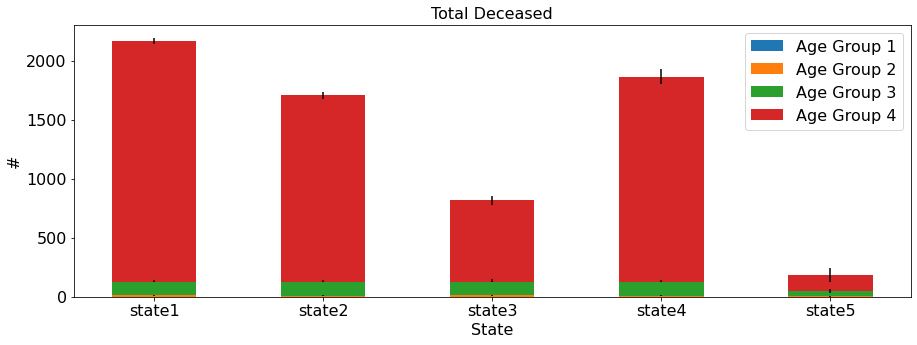

In [14]:
width =0.5     # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(15,5))
labels=['state1', 'state2', 'state3', 'state4', 'state5']

ax.bar(labels, df2['death_age_1'], yerr = df2_std['death_age_1'], width = width,  label='Age Group 1')
ax.bar(labels, df2['death_age_2'], yerr = df2_std['death_age_2'], width = width, bottom=df2['death_age_1'],  label='Age Group 2')
ax.bar(labels, df2['death_age_3'], yerr = df2_std['death_age_3'], width = width, bottom=df2['death_age_2'],  label='Age Group 3')
ax.bar(labels, df2['death_age_4'], yerr = df2_std['death_age_4'], width = width, bottom=df2['death_age_3'],  label='Age Group 4')

plt.xlabel('State', fontsize=16)
plt.ylabel('#', fontsize=16), 
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.title('Total Deceased',  fontsize=16)
ax.legend(prop={'size': 16})

plt.savefig(os.path.join(data_dir,'{}.png'.format('Total Death - split by age')), format='png')
plt.savefig(os.path.join(data_dir,'{}.eps'.format('Total Death - split by age')), format='eps')
plt.show()

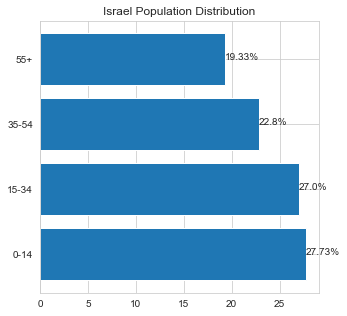

In [28]:
# Make fake dataset
fig, ax = plt.subplots(figsize=(5,5))
height = [27.73, 27.0, 22.8, 19.33]
bars = ('0-14', '15-34', '35-54', '55+')
y_pos = np.arange(len(bars))
 
 # Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
[plt.text(x, k, str(x)+'%') for k,x in enumerate(height)]
plt.title('Israel Population Distribution')
# save graphic
plt.savefig(os.path.join(data_dir,'{}.png'.format('Israel Population Distribution')), format='png')
plt.savefig(os.path.join(data_dir,'{}.eps'.format('Israel Population Distribution')), format='eps')
plt.show()


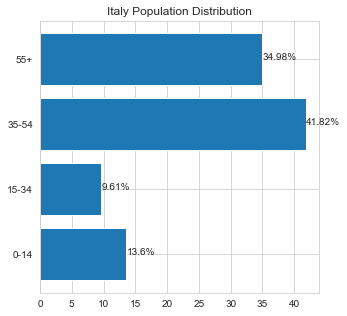

In [29]:
# Make fake dataset
fig, ax = plt.subplots(figsize=(5,5))
height = [13.6, 9.61, 41.82, 34.98]
bars = ('0-14', '15-34', '35-54', '55+')
y_pos = np.arange(len(bars))
 
 # Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
[plt.text(x, k, str(x)+'%') for k,x in enumerate(height)]
plt.title('Italy Population Distribution')
# Show graphic
plt.savefig(os.path.join(data_dir,'{}.png'.format('Italy Population Distribution')), format='png')
plt.savefig(os.path.join(data_dir,'{}.eps'.format('Italy Population Distribution')), format='eps')
plt.show()
